Name: Sam Brege A15476506

Group number: 10

# Instructions:
**To start working on this Homework, create a copy of this notebook and save it within your Google Drive (File -> Save a copy in Drive).**

This Jupyter notebook contains 4 exercises consisting of coding and discussion questions. For the discussion questions, please write your answer within a new text cell. Please hand in your .ipynb file (File -> Download -> Download .ipynb) on canvas by midnight on **April 18th**.

To execute the code, it is necessary to load some external packages, so please execute the following code block.

In [3]:
# @title Load packages
import numpy as np
import scipy.signal as sps
import matplotlib.pyplot as plt
from scipy.integrate import odeint
plt.rcParams["figure.figsize"] = (15,8)

# Exercise 1 - The Hodgkin Huxley model

## 1a.
Simulate a Hodgkin Huxley (HH) neuron subject to a single pulse current injection.
  * Plot the voltage as a function of time for different current amplitudes.
  * What is the spike threshold?
  * Bonus: Does the spike threshold depend on the duration of the pulse?

## 1b.
Simulate a HH neuron subject to a direct (constant) current injection.
* Characterize the voltage response as function of the current amplitude.
* Plot the f-I curve.

## 1c.
For the HH neuron in Exercise 1a,
* Pick a current amplitude above the spiking threshold.
* For each pair of variables V, m, n, h (6 pairs), plot one variable as a function of the other. 
* Identify pairs that are most strongly correlated. 
  How can this identification help in reducing the neuron model’s dimension?

* Does the choice of current amplitude affect which pairs of variables are most correlated?



To implement the HH model, you will need to implement the equations to model the Sodium, Potassium, and Leak currents:

All the equations necessary to model the Sodium current:

\begin{align}
  I_{Na}   &= \bar{g}_{Na} m^3 h (V-E_{Na})\\
  \alpha_m &= 0.1 \frac{V+40}{1-e^{-\frac{V+40}{10}}} \\
  \beta_m  &= 4 e^{-\frac{V+65}{18}} \\
  \tau_m &= \frac{1}{\alpha_m(V) + \beta_m(V)} \\
  m_0 &= \frac{\alpha_m(V)}{\alpha_m(V) + \beta_m(V)}\\
  \frac{dm}{dt} &= -\frac{1}{\tau_m (V)}[m-m_0(V)] \\
  \alpha_h &= 0.07 e^{-\frac{V+65}{20}} \\
  \beta_h  &= \frac{1}{1+e^{-\frac{V+35}{10}}} \\
  \tau_h &= \frac{1}{\alpha_h(V) + \beta_h(V)} \\
  h_0 &= \frac{\alpha_h(V)}{\alpha_h(V) + \beta_h(V)}\\
  \frac{dh}{dt} &= -\frac{1}{\tau_h (V)}[h-h_0(V)] \\
\end{align}

All the equations necessary to model the Potassium current:
\begin{align}
  I_{K}   &= \bar{g}_{K} n^4 (V-E_{K})\\
  \alpha_n &= 0.01 \frac{V+55}{1-e^{-\frac{V+55}{10}}} \\
  \beta_n  &= 0.125 e^{-\frac{V+65}{80}}\\
  \tau_n &= \frac{1}{\alpha_n(V) + \beta_n(V)} \\
  n_0 &= \frac{\alpha_n(V)}{\alpha_n(V) + \beta_n(V)}\\
  \frac{dn}{dt} &= -\frac{1}{\tau_n (V)}[n-n_0(V)] \\
\end{align}

All the equations to model the Leak current:
\begin{align}
  I_{L}   &= \bar{g}_{L} (V-E_{L})\\
\end{align}

Finally, the equation to model the change in the membrane potential due to some injected current $I_{inj}$:
$$ \frac{dV}{dt} = (I_{inj}(t) - I_{Na} - I_K - I_L)/ C_m $$

Some general hints:

For creating plots, we have imported matplotlib's pyplot package above. Be sure to read up on the official [documentation](https://matplotlib.org/3.5.1/api/_as_gen/matplotlib.pyplot.html) in case you get stuck. I have listed some functions that could be helpful below:


*   plt.[figure()](https://matplotlib.org/3.5.1/api/_as_gen/matplotlib.pyplot.figure.html) - Create a new figure.
* plt.[subplot()](https://matplotlib.org/3.5.1/api/_as_gen/matplotlib.pyplot.subplot.html) - Useful for creating multiple plots in one figure (for further information, see [here](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/multiple_figs_demo.html)).
*   plt.[plot()](https://matplotlib.org/3.5.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) -  	Plot y versus x as lines and/or markers.
* plt.[title()](https://matplotlib.org/3.5.1/api/_as_gen/matplotlib.pyplot.title.html#matplotlib.pyplot.title) - Set a Title.
* plt.[xlabel()](https://matplotlib.org/3.5.1/api/_as_gen/matplotlib.pyplot.xlabel.html#matplotlib.pyplot.xlabel) / plt.ylabel() - Label the axes.
* plt.[hist()](https://matplotlib.org/3.5.1/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist) - Plot a histogram.
* plt.[scatter()](https://matplotlib.org/3.5.1/api/_as_gen/matplotlib.pyplot.scatter.html#matplotlib.pyplot.scatter) - Plot a scatter plot.



For example, a simple plot of the sine and the cosine function could look like this:
```
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 5, 0.1)
y = np.sin(x)
y2= np.cos(x)
plt.plot(x, y, label='sin(x)')  # plot y as a function of x
plt.plot(x, y2, label='cos(x)') # plot y2 as a function of x

plt.title('Some title')    # set a title
plt.xlabel('X')            # label the x-axis
plt.ylabel('Y')            # label the y-axis
plt.legend()               # create a legend
plt.show()                 # show the plot. (not necessary for Jupyter notebooks/ Colab)

```

**Useful Resources**:
[Neuronal Dynamics, Chapter 2.2](https://neuronaldynamics.epfl.ch/online/Ch2.S2.html#Ch2.F3)



In [18]:
class HodgkinHuxley():
    """Full Hodgkin-Huxley Model implemented in Python"""
    def __init__(self,time):
        self.t = time


    # HH Constants                                           
    C_m  =   1.0    # [uF/cm^2] membrane capacitance
    g_Na = 120.0    # [mS/cm^2] Sodium (Na) maximum conductance
    g_K  =  36.0    # [mS/cm^2] Postassium (K) maximum conductance
    g_L  =   0.3    # [mS/cm^2] Leak maximum conductance

    E_Na =  50.0    # [mV] Sodium (Na) Nernst reversal potential
    E_K  = -77.0    # [mV] Potassium (K) Nernst reversal potential
    E_L  = -54.387  # [mV] Leak Nernst reversal potential

    def alpha_m(self, V):
        """Channel gating kinetics. Functions of membrane voltage"""
        return 0.1*(V+40.0)/(1.0 - np.exp(-(V+40.0) / 10.0))

    def beta_m(self, V):
        """Channel gating kinetics. Functions of membrane voltage"""
        return 4 * np.exp(-(V+65)/18)

    def tau_m(self, V):
        """Channel gating kinetics. Functions of membrane voltage"""
        return 1 / (self.alpha_m(V) + self.beta_m(V))

    def m_0(self, V):
        """Channel gating kinetics. Functions of membrane voltage"""
        return self.alpha_m(V) / (self.alpha_m(V) + self.beta_m(V))

    def alpha_h(self, V):
        """Channel gating kinetics. Functions of membrane voltage"""
        return 0.07 * np.exp(- (V+65) / 20)

    def beta_h(self, V):
        """Channel gating kinetics. Functions of membrane voltage"""
        return 1 / (1 + np.exp(- (V+35) / 10))

    def tau_h(self, V):
        """Channel gating kinetics. Functions of membrane voltage"""
        return 1 / (self.alpha_h(V) + self.beta_h(V))

    def h_0(self, V):
        """Channel gating kinetics. Functions of membrane voltage"""
        return self.alpha_h(V) / (self.alpha_h(V) + self.beta_h(V))

    def alpha_n(self, V):
        """Channel gating kinetics. Functions of membrane voltage"""
        return 0.01 * (V + 55) / (1 - np.exp(-(V+55)/10))

    def beta_n(self, V):
        """Channel gating kinetics. Functions of membrane voltage"""
        return 0.125 * np.exp(- (V+65)/80)

    def tau_n(self, V):
        """Channel gating kinetics. Functions of membrane voltage"""
        return 1 / (self.alpha_n(V) + self.beta_n(V))

    def n_0(self, V):
        """Channel gating kinetics. Functions of membrane voltage"""
        return self.alpha_n(V) / (self.alpha_n(V) + self.beta_n(V))

    def I_Na(self, V, m, h):
        """
        Membrane current (in uA/cm^2)
        Sodium (Na = element name)
        """
        return 120 * (m**3) * h * (V - 50)

    def I_K(self, V, n):
        """
        Membrane current (in uA/cm^2)
        Potassium (K = element name)
        """
        return 36 * (n**4) * (V + 77)
    
    #  Leak 
    def I_L(self, V):
        """
        Membrane current (in uA/cm^2)
        Leak
        """
        return 0.3 * (V + 54.387)

    def I_inj(self, t, iinj):
        """
        External Current
        """
        return iinj[0]*(t>iinj[1] - iinj[0]*(t>iinj[2]))

    @staticmethod
    def dALLdt(X, t, self):
        """
        Calculate the change in each of the variables.

        |  :param X:
        |  :param t:
        |  :return: calculate membrane potential & activation variables
        """
        V, m, h, n = X

        dVdt = (self.I_inj(t, self.iinj) - self.I_Na(V, m, h) - self.I_K(V, n) - self.I_L(V)) / 1
        dmdt = (-1 / (self.tau_m(V))) * (m - self.m_0(V))
        dhdt = (-1 / (self.tau_h(V))) * (h - self.h_0(V))
        dndt = (-1 / (self.tau_n(V))) * (n - self.n_0(V))
        
        return dVdt, dmdt, dhdt, dndt

    def HH_EX1a(self,iamp,tstep):
        """
        Simulate a Hodgkin Huxley (HH) neuron subject to a single pulse current injection.

        Plot the voltage as a function of time for different current amplitudes.
        What is the spike threshold?
        Bonus: Does the spike threshold depend on the duration of the pulse?
        
        (Hint: you can use the odeint function to integrate a system of equations.
        Docs: https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html)
        Example:
            X = odeint(self.dALLdt, [-65, 0.05, 0.6, 0.32], self.t, args=(self,))
            V = X[:,0]
            m = X[:,1]
            h = X[:,2]
            n = X[:,3]
        Here, the [-65, 0.05, 0.6, 0.32] are the initial values for V, m, h, and n respectively.
        """
        
        ...
        #fig, axs = plt.subplots(1, len(iamp))

        for i0 in range(0,np.size(iamp)):             # loop over different amplidtudes
            self.iinj = [iamp[i0],tstep[0],tstep[1]]  # set the amplitude and start/ stop of the injected step current
            X = odeint(self.dALLdt, [-65, 0.05, 0.6, 0.32], self.t, args=(self,)) # integrate the values over time
            V = X[:,0] # access all of the values for V
            m = X[:,1]
            h = X[:,2]
            n = X[:,3]

            plt.title('Voltage against Time')
            plt.xlabel('Time')
            plt.ylabel('Voltage')
            plt.plot(self.t, V, label=iamp[i0])
            plt.grid()
            plt.legend()
            

    def HH_EX1b(self,iamp,tstep):
        """
        Simulate a HH neuron subject to a direct (constant) current injection.
        * Characterize the voltage response as function of the current amplitude.
        * Plot the f-I curve.
        (Hint: you can use the odeint() function to integrate a system of equations.
        Docs: https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html)
        (Hint: you can use the find_peaks() function from scipy.signal to find when the model neuron spikes.
        Docs: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html
        Example: 
        sps.find_peaks(V, 0)) # finds all local maxima that have values larger than 0
        """
        
        peaks = []

        for i0 in range(0,np.size(iamp)):             # loop over different amplidtudes
            self.iinj = [iamp[i0],tstep[0],tstep[1]]  # set the amplitude and start/ stop of the injected step current
            X = odeint(self.dALLdt, [-65, 0.05, 0.6, 0.32], self.t, args=(self,)) # integrate the values over time
            V = X[:,0] # access all of the values for V
            m = X[:,1]
            h = X[:,2]
            n = X[:,3]

            #number of action potentials (ie. frequency)
            peak = sps.find_peaks(V, 0)
            peaks.append(len(peak[0]))

        plt.title('Frequency-Current Curve')
        plt.xlabel('Current')
        plt.ylabel('Frequency')
        plt.plot(iamp, peaks)

        
        
    def HH_EX1c(self,iamp,tstep):
        """
        For the HH neuron in Exercise 1a,
        * Pick a current amplitude above the spiking threshold.
        * For each pair of variables V, m, n, h (6 pairs), plot one variable as a function of the other.
        * Identify pairs that are most strongly correlated. 
          How can this identification help in reducing the neuron model’s dimension?
        * Does the choice of current amplitude affect which pairs of variables are most correlated?
        (Hint: you can use the odeint function to integrate a system of equations.
        Docs: https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html)
        """
        fig, axs = plt.subplots(6, 1)
        fig.set_size_inches(18.5, 50)

        for i0 in range(0,np.size(iamp)):             # loop over different amplidtudes
            self.iinj = [iamp[i0],tstep[0],tstep[1]]  # set the amplitude and start/ stop of the injected step current
            X = odeint(self.dALLdt, [-65, 0.05, 0.6, 0.32], self.t, args=(self,)) # integrate the values over time
            V = X[:,0] # access all of the values for V
            m = X[:,1]
            h = X[:,2]
            n = X[:,3]

        print(V)
        print(m)
        print(len(V))

        axs[0].plot(m, V)
        axs[0].set_ylabel('V')
        axs[0].set_xlabel('m')
        axs[0].set_title(' V-m')
        axs[1].plot(h, V)
        axs[1].set_ylabel('V')
        axs[1].set_xlabel('h')
        axs[1].set_title(' V-h')
        axs[2].plot(n, V)
        axs[2].set_ylabel('V')
        axs[2].set_xlabel('n')
        axs[2].set_title(' V-n')
        axs[3].plot(m, h)
        axs[3].set_ylabel('h')
        axs[3].set_xlabel('m')
        axs[3].set_title(' h-m')
        axs[4].plot(m, n)
        axs[4].set_ylabel('n')
        axs[4].set_xlabel('m')
        axs[4].set_title(' n-m')
        axs[5].plot(n, h)
        axs[5].set_ylabel('h')
        axs[5].set_xlabel('n')
        axs[5].set_title(' h-n')




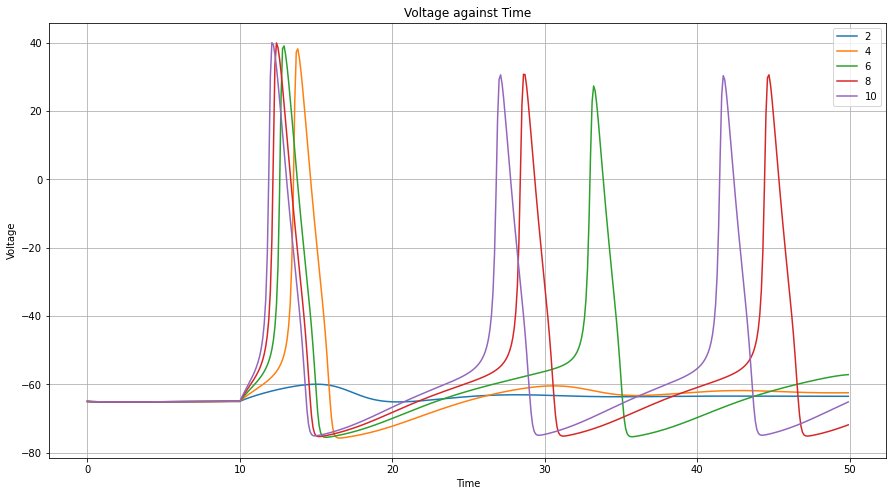

In [206]:
# You can use the following code to define some input current and call your HH_EX1a function.

runner1a = HodgkinHuxley(np.arange(0.0, 50.0, 0.1)) # simulate for 50ms
runner1a.HH_EX1a([2,4,6,8,10], [10,12])

Ex 1a

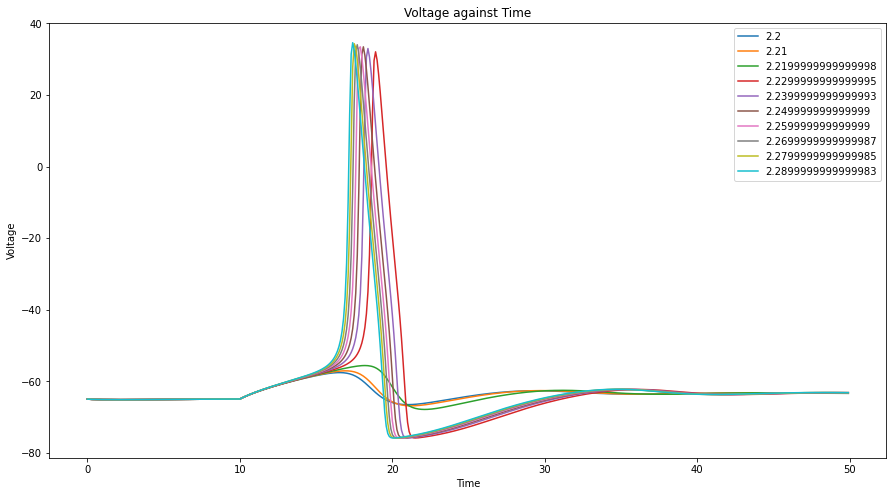

In [207]:
#looking for spike threshold
runner1aThreshold = HodgkinHuxley(np.arange(0.0, 50.0, 0.1)) # simulate for 50ms
runner1aThreshold.HH_EX1a(np.arange(2.2,2.3,0.01), [10,12])

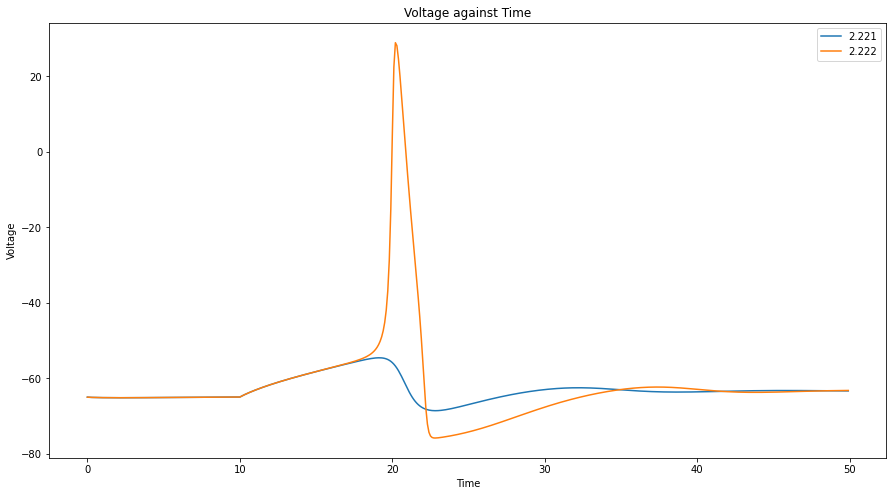

In [209]:
runner1aThreshold2 = HodgkinHuxley(np.arange(0.0, 50.0, 0.1)) # simulate for 50ms
runner1aThreshold2.HH_EX1a([2.221], [10,12])
runner1aThreshold2.HH_EX1a([2.222], [10,12])

As seen in the above graphs, the spike threshold appears to be about -55mV, with an input current of 2.221 being insufficient to trigger a spike and a current of 2.222 being sufficient to trigger one (though it doesn't reach as high a voltage as those triggered by a higher input current)

Ex 1b

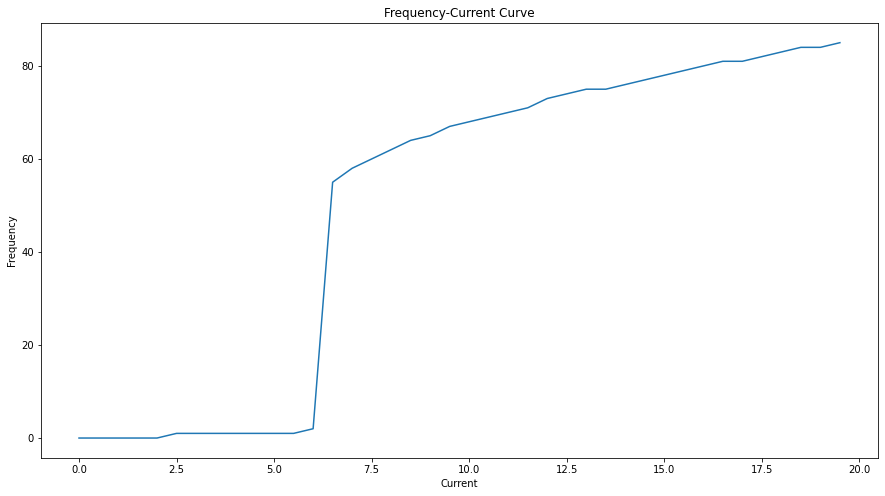

In [210]:
# You can use the following code to define some input current and call your HH_EX1b function.

runner1b = HodgkinHuxley(np.arange(0.0, 1000.0, 0.1)) # simulate for 1000ms
runner1b.HH_EX1b(np.arange(0,20,0.5), [10,12])

Ex 1c

[-65.         -65.02667542 -65.04653996 ... -62.07803564 -61.91919083
 -61.76130549]
[0.05       0.05097863 0.05157158 ... 0.07074153 0.07203276 0.07333581]
10000


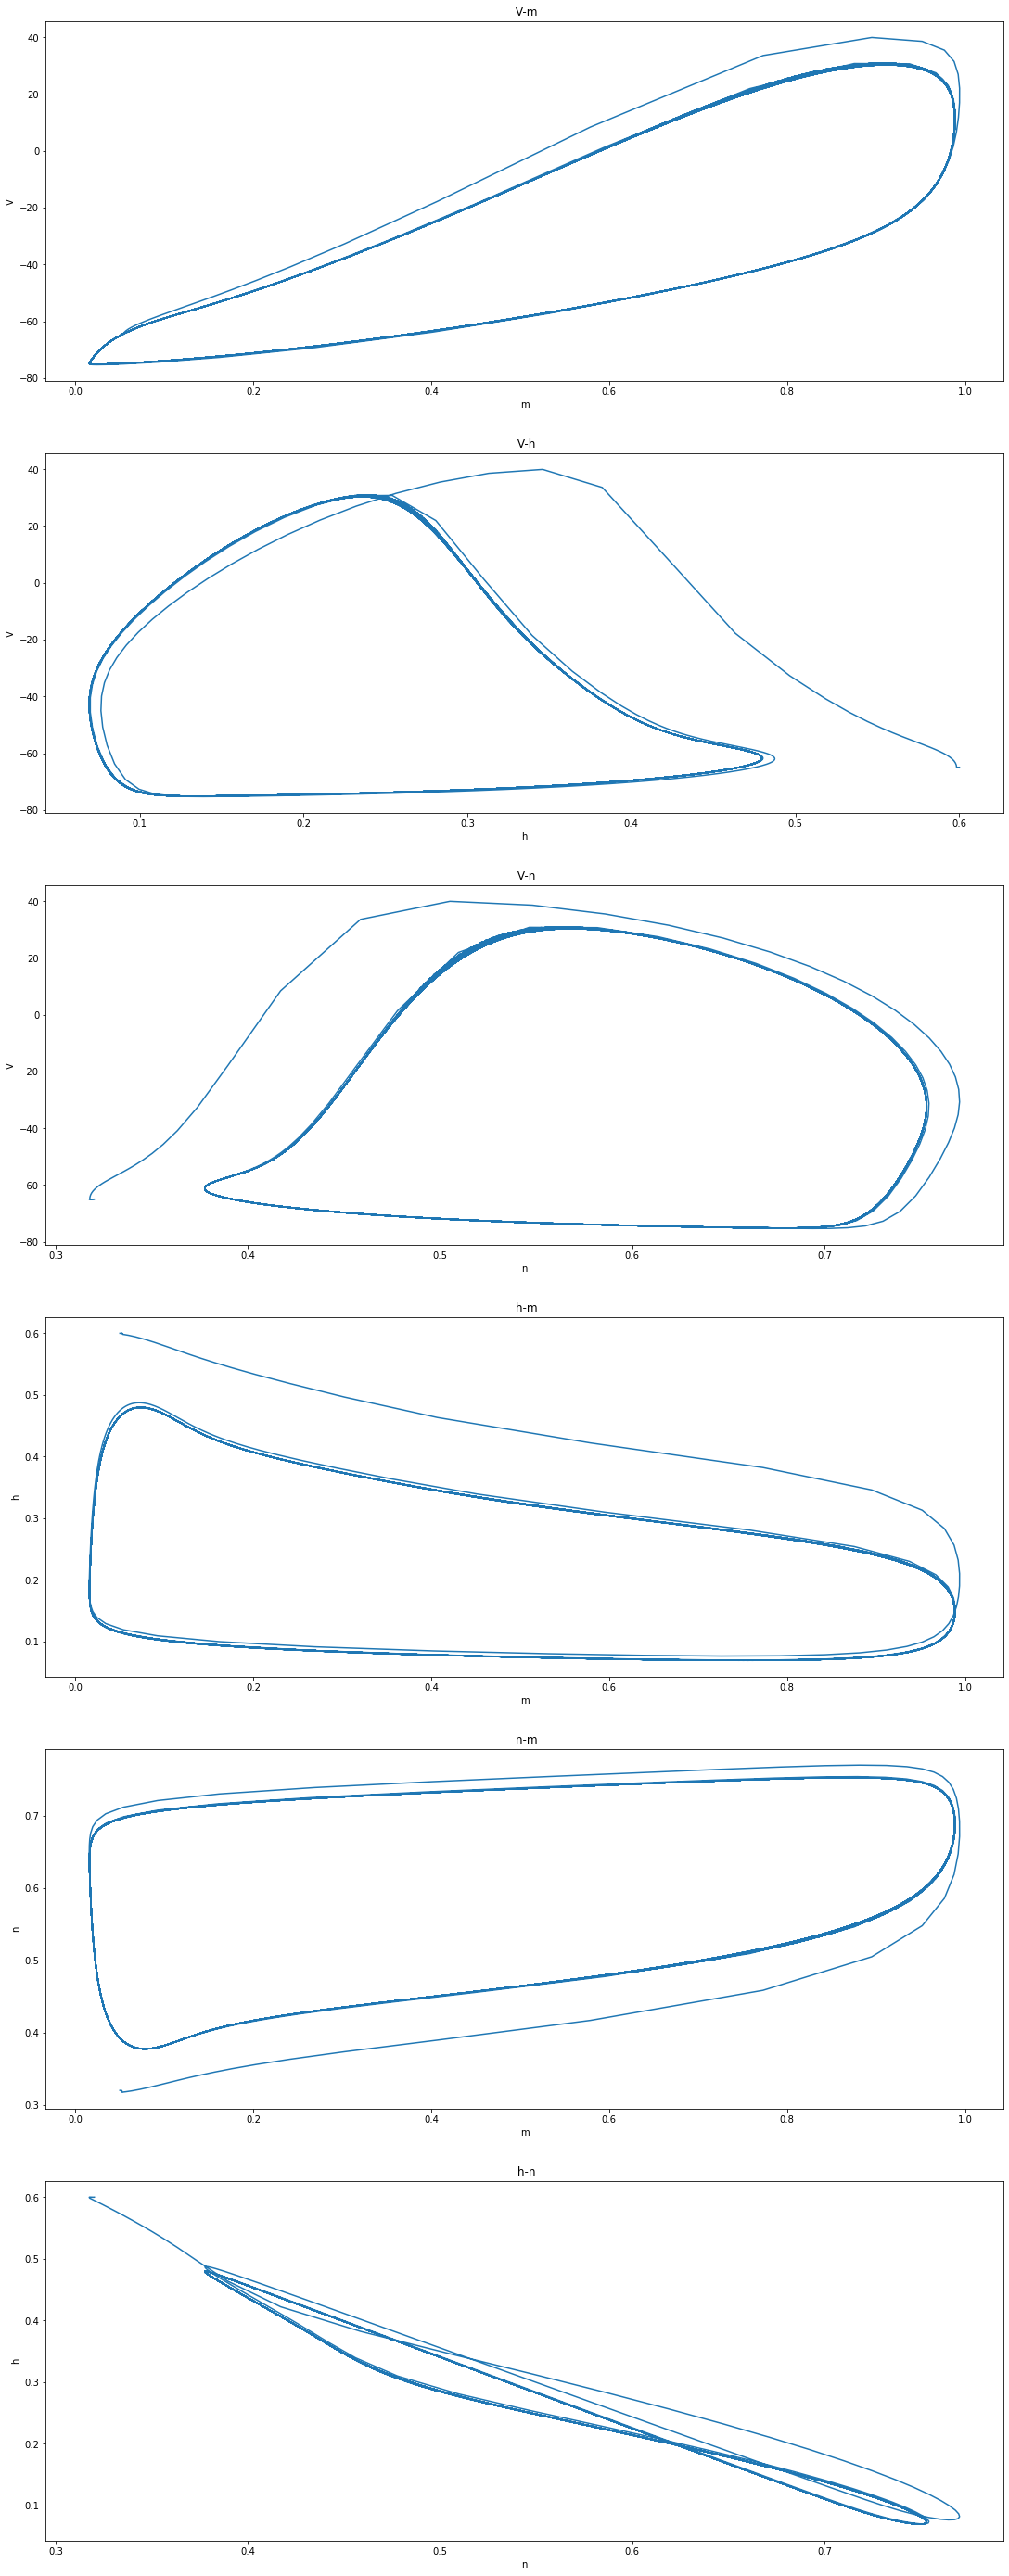

In [19]:
# You can use the following code to define some input current and call your HH_EX1c function.

runner1c = HodgkinHuxley(np.arange(0.0, 1000.0, 0.1)) # simulate for 1000ms
runner1c.HH_EX1c([8],[10,12])

The pairs that are most correlated with one another is Voltage and the Sodium activation (m), and Sodium inactivation (h) and Potassium activation (n). By looking at which pairs of variables are most and least correlated, we can deduce which variables can be left out whilst still maintaining the overall effect. The current has no effect on the correlation, so long as it is enough to trigger a spike.

# Exercise 2 - From four to two dimensions
Simulate a FitzHugh-Nagumo neuron model.
* Plot the f-I curve.
* Is it similar to what you got for the HH neuron?
* Are there ways in which the two models are different?
* Try to think of a scenario where it would be important to simulate the more complicated neuron model.

Hint for simulating FitzHugh-Nagumo model:
You have already simulated the Hodgkin-Huxley model: four coupled differential equations

\begin{aligned}
&C \frac{\mathrm{d} V}{\mathrm{~d} t}=-\bar{g}_{\mathrm{K}} n^{4}\left(V-V_{\mathrm{K}}\right)-\bar{g}_{\mathrm{Na}} m^{3} h\left(V-V_{\mathrm{Na}}\right)-\bar{g}_{1}\left(V-V_{\mathrm{l}}\right)+I \\
&\frac{\mathrm{d} n}{\mathrm{~d} t}=\alpha_{n}(V)(1-n)+\beta_{n}(V) n \\
&\frac{\mathrm{d} m}{\mathrm{~d} t}=\alpha_{m}(V)(1-m)+\beta_{m}(V) m \\
&\frac{\mathrm{d} h}{\mathrm{~d} t}=\alpha_{h}(V)(1-h)+\beta_{h}(V) h
\end{aligned}

The right hand side of each equation is the time derivative of the corresponding state variable. The python code computes this time derivative and puts it into a ODE solver.

To simulate the FitzHugh-Nagumo model, notice that the system of equations can be written in the same form. Here the system of equations is simpler: two ordinary differential equations.

FitzHugh-Nagumo Equations:
\begin{aligned}
&\frac{\mathrm{d} V}{\mathrm{~d} t}=V-\frac{1}{3} V^{3}-W+I \\
&\frac{\mathrm{d} W}{\mathrm{~d} t}=0.08(V+0.7-0.8 W)
\end{aligned}

In [5]:
class FitzHughNagumo():
    def __init__(self,time):
        self.t = time

    def I_inj(self, t, iinj):
        """
        External Current
        """

        return iinj[0]*(t>iinj[1] - iinj[0]*(t>iinj[2]))

    @staticmethod
    def dALLdt(X, t, self):
        """
        Integrate
        |  :return: calculate membrane potential & activation variable
        """
        V, W = X

        dVdt = V - (1/3 * (V**3)) - W + self.I_inj(t, self.iinj)
        dWdt = 0.08 * (V + 0.7 - (0.8 * W))
        return dVdt, dWdt

    def FN_EX2(self,iamp,tstep):
        """
        Simulate a FitzHugh-Nagumo neuron model.
        * Plot the f-I curve.
        * Is it similar to what you got for the HH neuron?
        * Are there ways in which the two models are different?
        * Try to think of a scenario where it would be important to simulate the more complicated neuron model.
        """

        peaks = []

        for i0 in range(0,np.size(iamp)):             # loop over different amplidtudes
            self.iinj = [iamp[i0],tstep[0],tstep[1]]  # set the amplitude and start/ stop of the injected step current
            X = odeint(self.dALLdt, [-65, -0.2], self.t, args=(self,)) # integrate the values over time
            V = X[:,0] # access all of the values for V
            W = X[:,1]


            #number of action potentials (ie. frequency)
            peak = sps.find_peaks(V, 0)
            peaks.append(len(peak[0]))

        plt.title('Frequency-Current Curve')
        plt.xlabel('Current')
        plt.ylabel('Frequency')
        plt.plot(iamp, peaks)


Ex 2

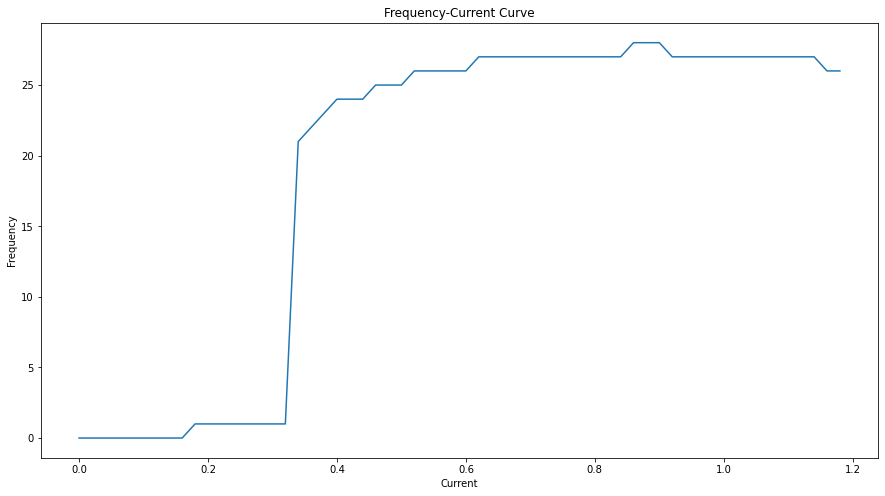

In [17]:
# You can use the following code to define some input current and call your FN_EX2 function.

runner2 = FitzHughNagumo(np.arange(0.0, 1000.0, 0.1))
runner2.FN_EX2(np.arange(0,1.2,0.02), [10,12])

In comparison with the HH neuron's fI curve, the overal shape of the FHN fI curve is very similar. The models are different in that they use different input values, so the frequency of the FHN neuron tops out at about 28 spikes, whereas the HH neuron reaches over 80. The rate at which the increase in frequency starts to decrease is also slightly different. I think in a situation where the experimenter cares about the different ion flows the HH model would be of benefit

# Exercise 3 - From two to one dimension 
Simulate a leaky integrate and fire neuron, subject to direct current injection.

* Plot the f-I curve.
  * What aspects of the f-I curves of Exercises 1a, 1b does it capture?
  * What aspects does it not capture?
* Try to think of a scenario where it would be important to simulate the more complicated neuron model.



**Useful resources:**

[NMA, week 2, day 3, tutorial 1](https://compneuro.neuromatch.io/tutorials/W2D3_BiologicalNeuronModels/student/W2D3_Tutorial1.html)

Section 1: implementation

Section 2: inputs

Section 3: f-I curve

Text(0, 0.5, 'Frequency')

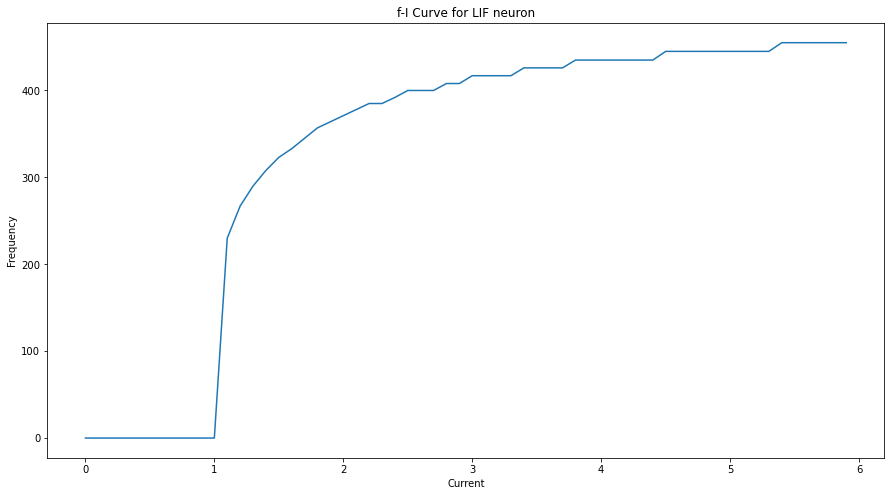

In [250]:
Vth = 1    # threshold voltage
Vr  = 0    # reset voltage
tref = 2   # refractory period [ms]
dt = 0.05  # integration timestep [ms]
T  = 1000  # simulation duration [ms]

t      = np.arange(0.0, T, dt)          # time array
InjAmp = np.arange(0,6,0.1)           # injected amplitude  
freq   = np.zeros(np.size(InjAmp),)     # frequency array
Lt     = np.size(t)
Vt     = np.zeros([np.size(InjAmp),Lt]) # voltage trace array


#Loops through voltage trace
for i in range(len(Vt)):
    iinj = InjAmp[i]
    Vt[i][0] = Vr 
    #ongoing refractory period runtime in ms
    tr = 0

    for it in range(len(Vt[i])):

        #refractory check
        if tr > 0:
            #reset voltage
            Vt[i][it] = Vr
            #reducing runtime on refractory period by 1 timestep
            tr = tr - dt

        #threshold check
        elif Vt[i][it] >= Vth:
            #adds spike to total count for this current
            freq[i] += 1
            Vt[i][it] = Vr
            #start refractory period
            tr = tref
            
        #equation for dv from lecture
        dv = (-Vt[i][it]+iinj) * dt
        
        if it < len(Vt[i])-1:
            Vt[i][it+1] = Vt[i][it] + dv

plt.plot(InjAmp,freq)
plt.title('f-I Curve for LIF neuron')
plt.xlabel('Current')
plt.ylabel('Frequency')

        


A situation where it is more important to use a more complicated model would be one in which keeping to similar currents, voltages, and frequencies as biological neurons is necessary.

# Exercise 4
Simulate a **LIF** neuron subject a noisy input current (using uncorrelated Gaussian noise). For this exercise it is sufficient to generate gaussian noise centered at 0 while varying the standard deviation. Hint: you can use [np.random.normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) to draw (pseudo) random numbers from a gaussian distribution.

* Plot the **f-I curve**: average spike frequency as a function of the standard deviation of the input.

  Do this for a few different values of the standard deviation of the input noise.

* Plot the inter-spike-interval distribution of the neuron.

  Describe in words what the inter-spike-interval distribution would be if the input was constant (with no noise)?

  Comment on how these distributions can be used to characterize the input statistics.

Text(0.5, 0, 'Current')

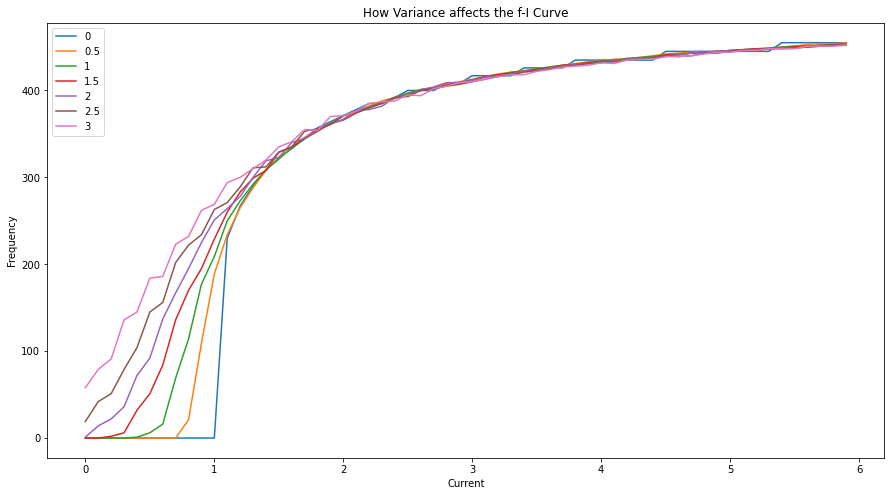

In [249]:
Vth = 1    # threshold voltage
Vr  = 0    # reset voltage
tref = 2   # refractory period [ms]
dt = 0.05  # integration timestep [ms]
T  = 1000  # simulation duration [ms]

#parameters for normal distribution
sigma = [0,0.5,1,1.5,2,2.5,3]
mu = 0

#Loops through multiple variances
for sig in sigma:
    #reset parameters each time
    t      = np.arange(0.0, T, dt)          # time array
    InjAmp = np.arange(0,6,0.1)             # injected amplitude  
    freq   = np.zeros(np.size(InjAmp),)     # frequency array
    Lt     = np.size(t)
    Vt     = np.zeros([np.size(InjAmp),Lt]) # voltage trace array
    for i in range(len(Vt)):
        
        Vt[i][0] = Vr 

        #ongoing refractory period runtime in ms
        tr = 0

        for it in range(len(Vt[i])):
            iinj = InjAmp[i] + np.random.normal(mu, sig, 1)

            #refractory check
            if tr > 0:
                #reset voltage
                Vt[i][it] = Vr
                #reducing runtime on refractory period by 1 timestep
                tr = tr - dt

            #threshold check
            elif Vt[i][it] >= Vth:
                #adds spike to total count for this current
                freq[i] += 1
                Vt[i][it] = Vr
                #start refractory period
                tr = tref
                
            #equation for dv
            dv = (-Vt[i][it]+iinj) * dt
            #print(dv)
            if it < len(Vt[i])-1:
                Vt[i][it+1] = Vt[i][it] + dv
                #print(Vt[i][it+1])

    plt.plot(InjAmp,freq, label=sig)
plt.legend()
plt.title('How Variance affects the f-I Curve')
plt.ylabel('Frequency')
plt.xlabel('Current')


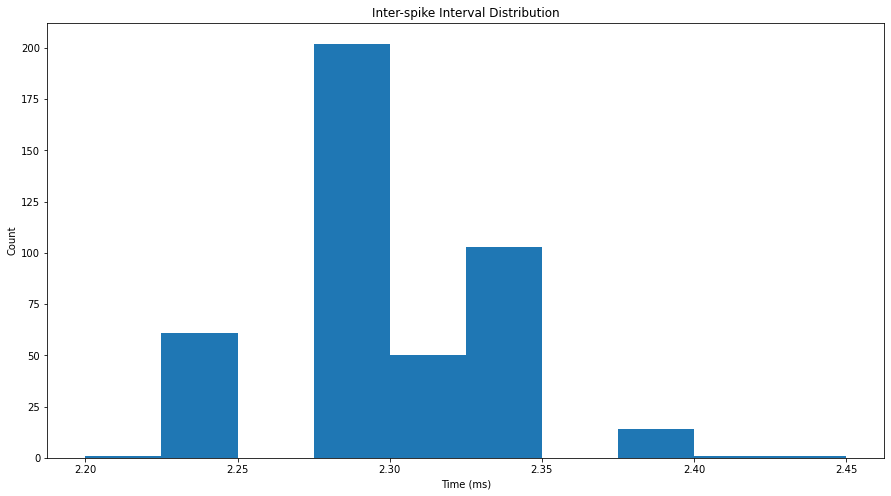

In [248]:
Vth = 1    # threshold voltage
Vr  = 0    # reset voltage
tref = 2   # refractory period [ms]
dt = 0.05  # integration timestep [ms]
T  = 1000  # simulation duration [ms]

t      = np.arange(0.0, T, dt)          # time array
InjAmp = np.arange(0,6,0.1)           # injected amplitude  
InjAmp = [4]
freq   = np.zeros(np.size(InjAmp),)     # frequency array
Lt     = np.size(t)
Vt     = np.zeros([np.size(InjAmp),Lt]) # voltage trace array
mu = 0
sigma = 1
spikeTimes = []

#Loops through voltage trace
for i in range(len(Vt)):
    
    Vt[i][0] = Vr 
    #ongoing refractory period runtime in ms
    tr = 0

    for it in range(len(Vt[i])):
        #adding noise
        iinj = InjAmp[i] + np.random.normal(mu, sigma, 1)
        #refractory check
        if tr > 0:
            #reset voltage
            Vt[i][it] = Vr
            #reducing runtime on refractory period by 1 timestep
            tr = tr - dt

        #threshold check
        elif Vt[i][it] >= Vth:
            #adds spike to total count for this current
            freq[i] += 1
            Vt[i][it] = Vr
            #start refractory period
            tr = tref
            #records time of spike in ms
            spikeTimes.append(it*dt)
        #equation for dv
        dv = (-Vt[i][it]+iinj) * dt
        if it < len(Vt[i])-1:
            Vt[i][it+1] = Vt[i][it] + dv

    #calculates intervals
    isi = np.diff(spikeTimes)
    
    plt.hist(isi)
    plt.xlabel('Time (ms)')
    plt.ylabel('Count')
    plt.title('Inter-spike Interval Distribution')
    

If the input were constant (no noise), then the inter-spike intervals would all be the same, so the distribution would be pretty much a straight line with nearly each interval in the same bin. These distribution can be used to see how noisy the input is.